In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm


# Path to celeb dataset
PATH = '/workspace/AI/OpenSource/celebrities/'
celeb_data = pd.read_csv(PATH + 'identity_CelebA.txt', sep=" ", header=None)
celeb_data.columns = ["image", "label"]

#### Visualize few images of the same person

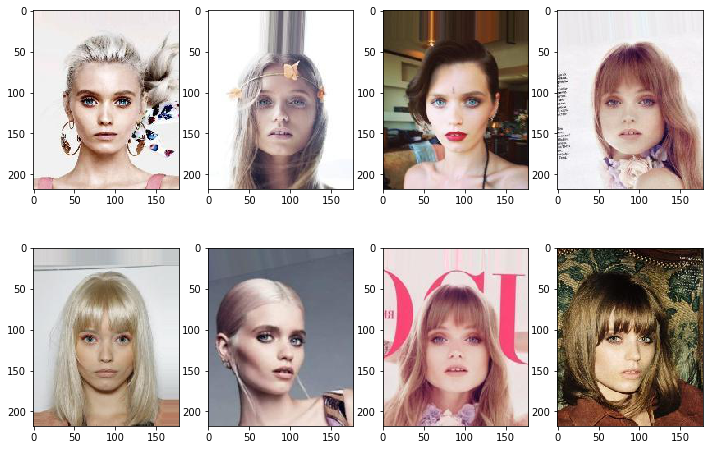

In [2]:
files = celeb_data.iloc[celeb_data['label'].values == 27]['image'].values
rnd_files = np.random.choice(files, 8, replace=False)

plt.figure(figsize=(12,8))
for i, file in enumerate(rnd_files):
    plt.subplot(2,4,i+1)
    x = plt.imread(PATH + 'img_align_celeba/{}'.format(file))
    plt.imshow(x)

## Convolution features extraction
#### Applying pre-trained classification model (densenet) on celeb dataset.
The purpose of doing so is to sustancially reduce the computational consumption when training siamese net on the conv features.

In [5]:
from keras.applications.densenet import DenseNet121, preprocess_input
from keras import backend as K
from keras.models import Model
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D

# Load pre-trained DenseNet
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(218, 178, 3))
output = GlobalAveragePooling2D()(densenet.output)
Convfeat = Model(densenet.input, output)
preds = np.zeros( (len(celeb_data),) + K.int_shape(Convfeat.output)[1:] )

# Extract convolution features from every image. It may take few hours... (1.5 hrs with one NVIDIA-1080Ti)

for k, file in tqdm(enumerate(celeb_data['image'])):
    
    img = image.load_img(PATH + 'img_align_celeba/{}'.format(file))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds[k] = Convfeat.predict(x)[0]

np.save('conv_feats', preds)

202599it [1:15:26, 44.76it/s]
